### Imports

In [1]:
import os
# Kaggle API key
os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/itadi/Desktop/data-science'

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [76]:
# Color palette
color_palette = ["#ffcad4", "#17c3b2", "#ffcb77", "#003049","#fe6d73", "#6f1d1b"]

sns.set_palette(color_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_palette)
plt.rcParams['figure.figsize'] = (10, 6)


In [81]:
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']

### Download dataset from Kaggle

In [3]:
def downloadDataset():

    """
    Download dataset from Kaggle
    """

    dataset = 'asaniczka/top-spotify-songs-in-73-countries-daily-updated'

    downloadPath = './dataset'
    if not os.path.exists(downloadPath):
        os.makedirs(downloadPath)

    for file in tqdm(os.listdir(downloadPath), desc="Processing files"):
        filePath = os.path.join(downloadPath, file)
        try:
            if os.path.isfile(filePath):
                os.unlink(filePath)
                print('Old files deleted successfully!')
        except Exception as e:
            print(f'Failed to delete {filePath}. Reason: {e}')
        
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(dataset, path=downloadPath, unzip=True)

    print('Dataset downloaded successfully!')

# Download dataset
downloadDataset()

Processing files: 100%|██████████| 1/1 [00:00<00:00, 449.65it/s]

Old files deleted successfully!
Dataset URL: https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated


Dataset downloaded successfully!


### Preprocessing + EDA
- Dataset exploration
- Data cleaning
- Outlier Detection
- Univariate analysis
- Bivariate analysis
- Categorical vs. Numerical Analysis
- Feature Engineering
- Multicollinearity

In [4]:
df = pd.read_csv('dataset/universal_top_spotify_songs.csv')
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2024-10-21,100,False,...,6,-7.777,0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3
1,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",2,1,48,NaN,2024-10-21,76,False,...,0,-4.477,0,0.2600,0.02830,0.000000,0.3550,0.939,149.027,4
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,-1,-1,NaN,2024-10-21,98,False,...,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,4,0,-1,NaN,2024-10-21,92,False,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
4,1cOboCuWYI2osTOfolMRS6,Tu Boda,"Oscar Maydon, Fuerza Regida",5,2,45,NaN,2024-10-21,86,True,...,6,-6.968,1,0.0784,0.49600,0.000014,0.0787,0.471,112.648,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336046 entries, 0 to 1336045
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1336046 non-null  object 
 1   name                1336018 non-null  object 
 2   artists             1336018 non-null  object 
 3   daily_rank          1336046 non-null  int64  
 4   daily_movement      1336046 non-null  int64  
 5   weekly_movement     1336046 non-null  int64  
 6   country             1317889 non-null  object 
 7   snapshot_date       1336046 non-null  object 
 8   popularity          1336046 non-null  int64  
 9   is_explicit         1336046 non-null  bool   
 10  duration_ms         1336046 non-null  int64  
 11  album_name          1335386 non-null  object 
 12  album_release_date  1335548 non-null  object 
 13  danceability        1336046 non-null  float64
 14  energy              1336046 non-null  float64
 15  key            

In [6]:
df.isnull().sum()

spotify_id                0
name                     28
artists                  28
daily_rank                0
daily_movement            0
weekly_movement           0
country               18157
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              660
album_release_date      498
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [23]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df.columns

Index(['name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms',
       'album_name', 'album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'daily_movement_abs'],
      dtype='object')

In [7]:
# Country we cannot fill. Drop country where we have a null value
# Album_name cannot be filled. Drop
# Release date depends on album. Cannot be filled using summary statics. Drop

df.dropna(axis=0, subset=['country', 'album_name', 'album_release_date'], inplace=True)

In [93]:
df.head()

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,instrumentalness,liveness,valence,tempo,time_signature,daily_movement_abs,initial_rank,final_rank,rank_change,year_month
0,Gucci,"Mthandeni SK, MaWhoo",1,0,0,ZA,2024-10-21,60,False,247617,...,0.011000,0.3040,0.863,146.727,4,0,1,12,-11,2024-10
1,Sdakiwe Sbali (feat. Bless The Gentleman & DJ ...,"Blaq Major, BLESS THE GENTLEMAN, DJ KAP",2,0,0,ZA,2024-10-21,62,False,245740,...,0.000000,0.0608,0.753,114.043,4,0,2,23,-21,2024-10
2,Wishi Wishi (feat. Scotts Maphuma & Young Stunna),"Kabza De Small, Vigro Deep, DJ Maphorisa, Scot...",3,0,47,ZA,2024-10-21,47,False,381428,...,0.000078,0.2530,0.413,112.009,4,0,3,3,0,2024-10
3,Ndisize,"Caiiro, Ami Faku",4,0,3,ZA,2024-10-21,57,False,315116,...,0.264000,0.0918,0.515,117.003,4,0,4,25,-21,2024-10
4,Zase England,"Blacko SA, Mellow & Sleazy, Scotts Maphuma",5,0,-1,ZA,2024-10-21,59,False,369815,...,0.000000,0.0653,0.310,112.014,4,0,5,39,-34,2024-10


#### Dataset Exploration

In [8]:
len(df.snapshot_date.unique()) 
# 1 year worth of data

368

In [83]:
initial_date = df['snapshot_date'].min()
final_date = df['snapshot_date'].max()
print(f"Data spans from {initial_date} to {final_date}")

Data spans from 2023-10-18 00:00:00 to 2024-10-21 00:00:00


In [9]:
df.drop(['spotify_id'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [90]:
print(f'The number of total songs: {df.shape[0]}')  
print(f'The number of unique songs: {df['name'].nunique()}')  
print(f'The number of unique artists: {df['artists'].nunique()}')  
print(f'The number of unique countries: {df['country'].nunique()}')  

The number of total songs: 1317232
The number of unique songs: 14609
The number of unique artists: 9620
The number of unique countries: 72


- High Redundancy in Song Data:
    - Out of 1,317,232 total songs, there are only 14,609 unique songs. This suggests a significant amount of repetition in the data, meaning the same songs are likely appearing multiple times, possibly in different countries or across different dates.
    - This redundancy is expected, as popular songs tend to chart over extended periods or across various regions, so it's common to see the same song ranked on multiple occasions.

- Diverse Artist Representation:
    - With 9,620 unique artists contributing to the 14,609 unique songs, this indicates a wide variety of artists. However, some artists are likely more prominent, releasing multiple songs or having several chart-toppers across different countries or timeframes.
    - *We can also explore which artists are dominating the dataset in terms of song count or popularity.*

- Global Coverage:
    - The data includes songs from 72 different countries, providing a diverse set of cultural preferences and trends. 
    - *We could explore how music preferences differ across these countries and whether certain features like 'danceability' or 'energy' are more dominant in specific regions.*


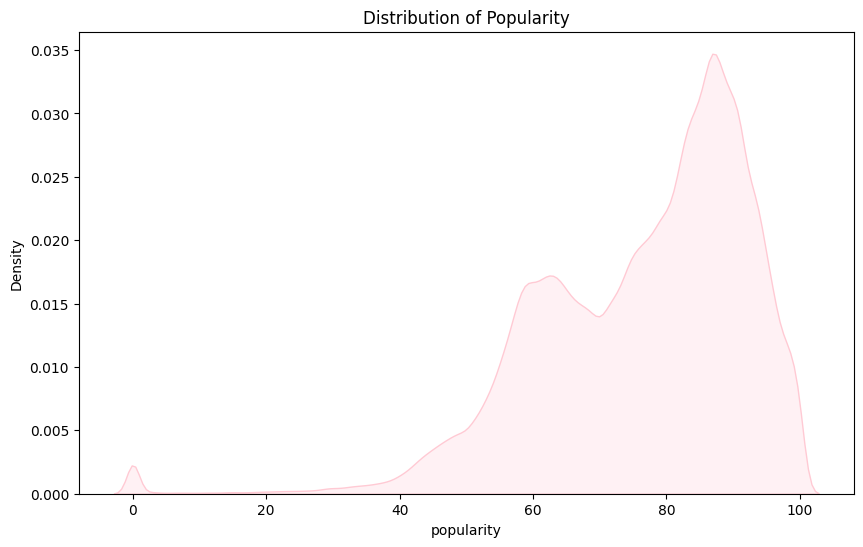

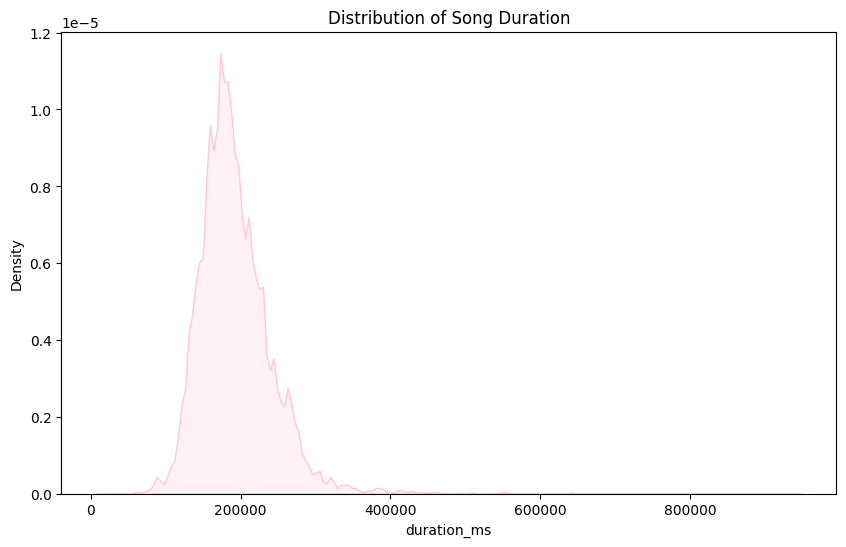

In [114]:
sns.kdeplot(df['popularity'], fill=True)
plt.title('Distribution of Popularity')
plt.show()

sns.kdeplot(df['duration_ms'], fill=True)
plt.title('Distribution of Song Duration')
plt.show()

- The majority of the top songs in this dataset have a popularity rating ranging from 80 to 100. This is expected, as the dataset focuses on top songs from Spotify, highlighting the platform's most popular tracks.

- On average, the songs in this dataset have a length of approximately 20,000 milliseconds, which is close to 6 minutes. This average duration suggests a tendency toward longer tracks, which might be a common feature among popular songs in this dataset.

artists
Sabrina Carpenter    18514
Billie Eilish        17718
Taylor Swift         17342
KAROL G              14220
Benson Boone         11236
Feid                 10565
Jimin                 9717
Tate McRae            9545
Teddy Swims           8911
Ariana Grande         8747
Name: count, dtype: int64


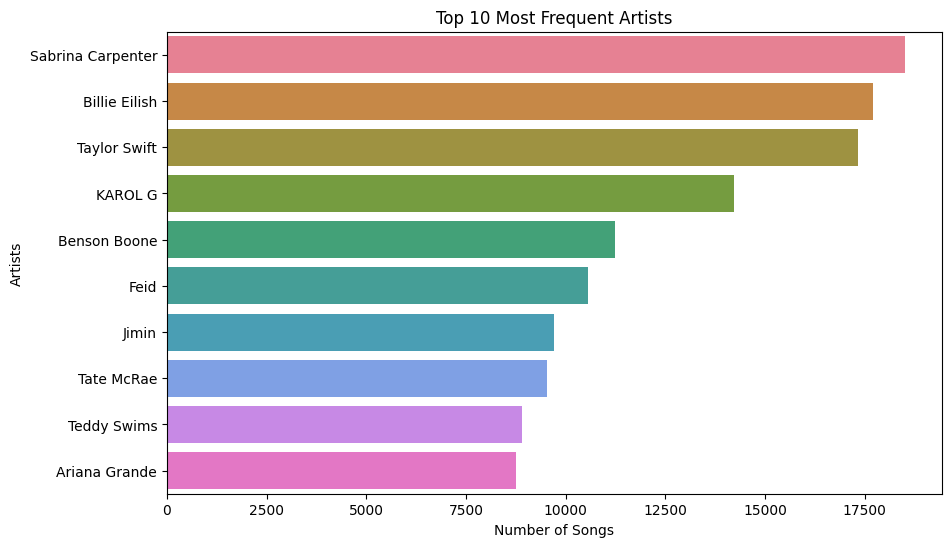

In [113]:
artist_counts = df['artists'].value_counts()

top_10_artists = artist_counts.head(10)

sns.barplot(x=top_10_artists.values, y=top_10_artists.index, hue=top_10_artists.index, dodge=False, legend=False)
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()

- Top Artists
    - Sabrina Carpenter leads with 18,514 songs, indicating she may have a substantial presence in the dataset, either through a prolific release of tracks or collaborations.
    - Billie Eilish and Taylor Swift follow with 17,718 and 17,342 songs, respectively, showing their strong influence and popularity in the music industry.

- Diversity of Artists:
    - The range of artists includes different genres, from pop (Billie Eilish, Taylor Swift) to reggaeton (KAROL G), indicating a variety of music styles represented in your dataset.

- Less Popular Artists:
    - The artists with fewer songs, like Teddy Swims and Ariana Grande, still have a significant number of tracks, suggesting that they have established careers but might not be as prolific as the leading artists.

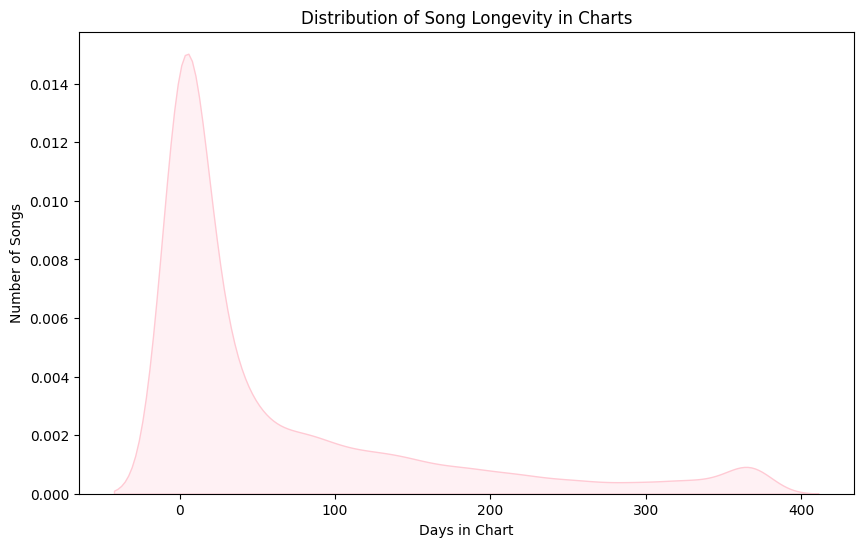

In [98]:
song_longevity = df.groupby('name')['snapshot_date'].agg(['min', 'max'])
song_longevity['days_in_chart'] = (song_longevity['max'] - song_longevity['min']).dt.days

sns.kdeplot(song_longevity['days_in_chart'], fill=True)
plt.title('Distribution of Song Longevity in Charts')
plt.xlabel('Days in Chart')
plt.ylabel('Number of Songs')
plt.show()

- Rarely a song stays on the top of the charts for over a couple of days. Justified with the curve being particulary left-skewed

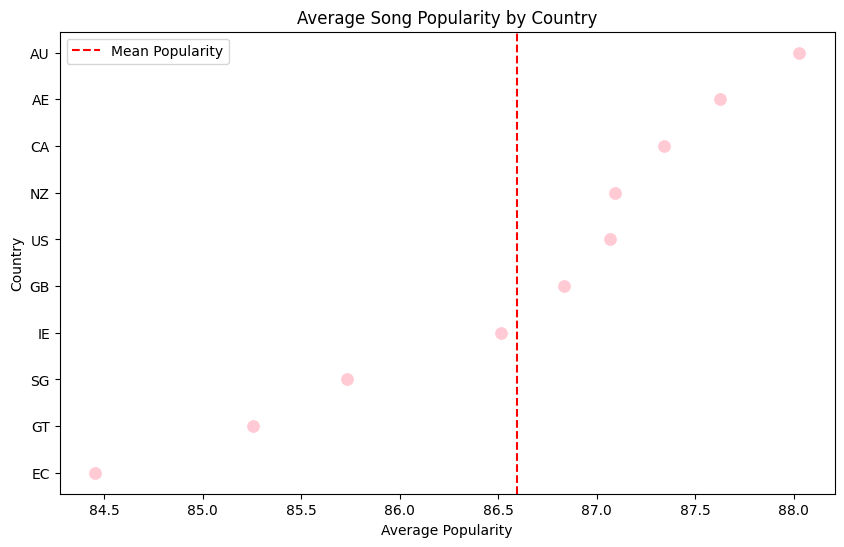

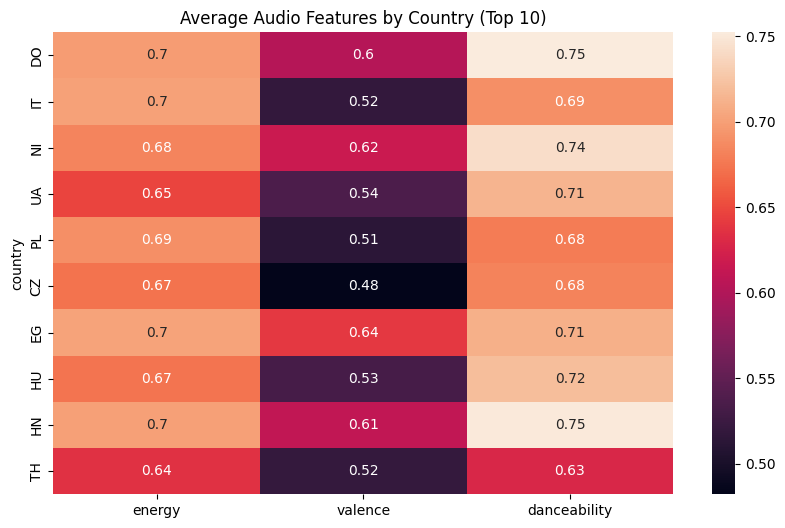

In [107]:
country_song_count = df['country'].value_counts()

country_popularity = df.groupby('country')['popularity'].mean().sort_values(ascending=False)
country_popularity = country_popularity.head(10)

sns.scatterplot(x=country_popularity.values, y=country_popularity.index, s=100)
plt.title("Average Song Popularity by Country")
plt.xlabel("Average Popularity")
plt.ylabel("Country")
plt.axvline(x=country_popularity.mean(), color='red', linestyle='--', label='Mean Popularity')
plt.legend()
plt.show()

country_audio_features = df.groupby('country')[['energy', 'valence', 'danceability']].mean()

top_10_countries = df['country'].value_counts().head(10).index
sns.heatmap(country_audio_features.loc[top_10_countries], annot=True)
plt.title('Average Audio Features by Country (Top 10)')
plt.show()


- Australia (AU) leads with the highest average popularity, suggesting that songs originating or trending there tend to perform exceptionally well. This could indicate a strong music market or cultural preferences leaning toward popular music.

- United Arab Emirates (AE) and Canada (CA) closely follow. These countries also seem to produce or favor highly popular tracks. Canada's strong performance aligns with its reputation for having globally recognized artists like Drake, The Weeknd, and Justin Bieber.

- New Zealand (NZ) and United States (US) have almost identical average song popularity, which is interesting considering the global influence of US music. However, this shows that New Zealand is equally competitive when it comes to promoting songs that resonate with audiences.

- United Kingdom (GB) ranks 6th, lower than some may expect, given its notable influence on global music. This might hint at a diverse music scene where not every song achieves peak popularity despite the presence of major artists.

- Latin American countries like Guatemala (GT) and Ecuador (EC) appear lower on the list but are still in the top 10. Their inclusion suggests that popular music is also thriving in these regions, reflecting perhaps the growing global influence of Latin music.

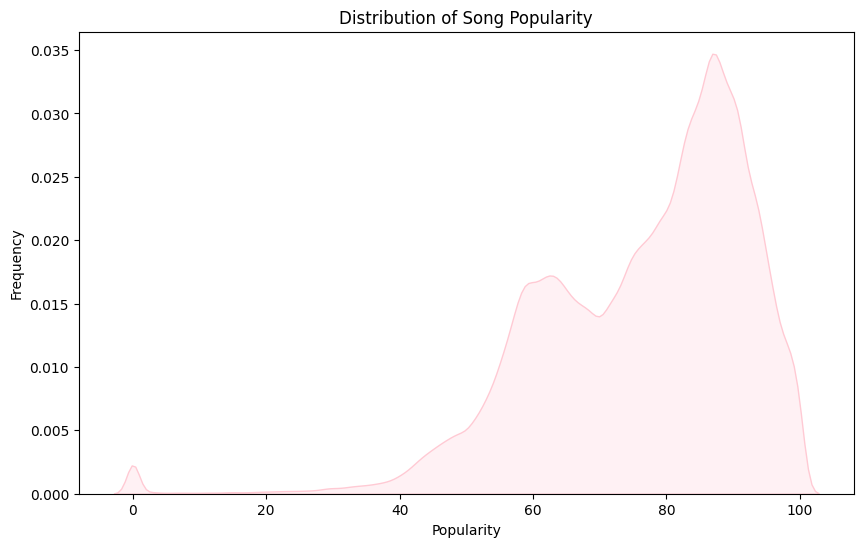

In [73]:
sns.kdeplot(df['popularity'], fill=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

- Most songs in the dataset fall within the 60-90 popularity range, indicating that a majority of the tracks are relatively popular.
- There is a clear peak between 70 and 80 popularity. This suggests that a significant portion of the songs tend to cluster around this range, making it the most common level of popularity.
- There are very few songs with popularity scores below 20, showing that only a small number of tracks are very unpopular in this dataset.
- Songs with popularity scores above 90 exist but are much rarer. This indicates that only a small subset of songs reaches the highest levels of popularity.
- The distribution is right-skewed, meaning that while the majority of songs are somewhat popular, there are fewer songs at the very low end, and only a few manage to reach the extreme high end of popularity.

In [29]:
# Average popularity of explicit vs non-explicit songs
explicit_popularity = df.groupby('is_explicit')['popularity'].mean()
print("Average Popularity by Explicit Content:")
explicit_popularity

Average Popularity by Explicit Content:


is_explicit
False    75.253486
True     78.680010
Name: popularity, dtype: float64

- Explicit songs have a slightly higher average popularity (78.68) compared to non-explicit songs (75.25).
- This suggests that explicit content might correlate with greater audience appeal or attention.

In [111]:
song_rankings = df.groupby('name').agg({'popularity': ['mean', 'std'], 'daily_rank': 'mean'}).reset_index()
song_rankings.columns = ['name', 'avg_popularity', 'std_popularity', 'avg_rank']


consistently_high_songs = song_rankings[(song_rankings['avg_popularity'] > 85) & (song_rankings['std_popularity'] < 5)]
consistently_high_songs.head(10)


,name,avg_popularity,std_popularity,avg_rank
21,...Ready For It?,86.210526,1.988588,29.657895
263,500lbs,85.040115,2.085416,29.610315
294,7 Years,86.000000,0.000000,48.500000
350,A Holly Jolly Christmas,89.509294,2.474668,29.542751
375,A Sky Full of Stars,87.243750,1.666340,26.143750
403,ACHO PR,85.222222,0.815107,36.888889
462,AMARGURA,87.949668,2.124469,19.453180
555,Abcdario,85.600000,0.516398,48.300000
655,Ain't No Mountain High Enough,87.529412,1.331103,39.294118
656,Ain't No Sunshine,86.400000,0.599517,43.928571


- High Average Popularity:
    - The songs "A Holly Jolly Christmas" (avg. popularity: 89.51) and "...Ready For It?" (avg. popularity: 86.21) are among the highest-ranking songs, suggesting they are widely appreciated across the dataset.

- Low Standard Deviation:
    - Songs like "7 Years" and "Abcdario" have a standard deviation of 0, indicating they maintained a consistent popularity ranking without fluctuations. This suggests a steady audience preference.

- Average Rank Insights:
    - The avg_rank column provides context on how these songs perform relative to others. For instance, "A Holly Jolly Christmas" ranks approximately 29.54, indicating it performs better on average than most songs in the dataset.

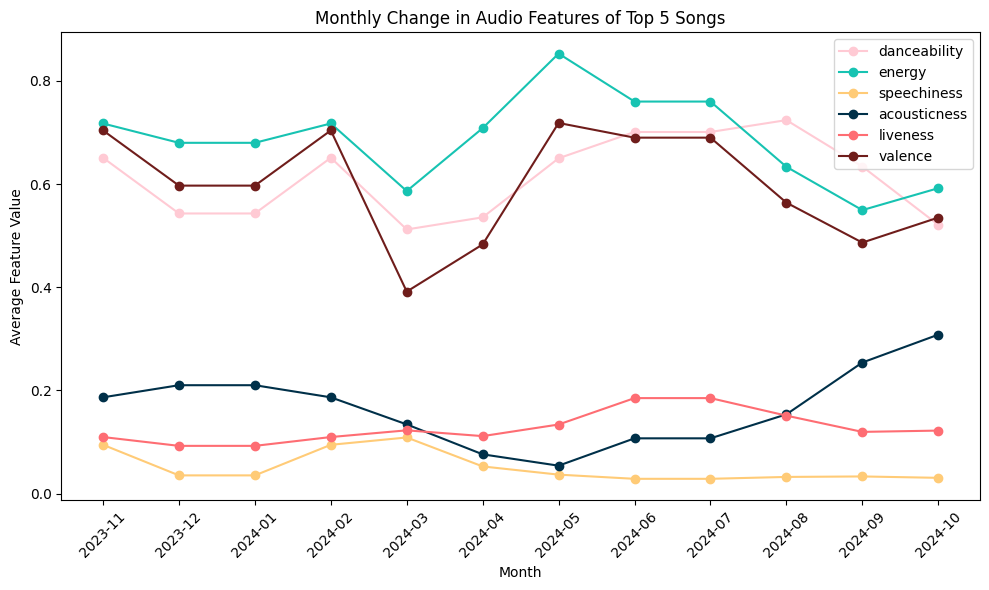

In [85]:
df['year_month'] = df['snapshot_date'].dt.to_period('M')

top_5_songs = df.sort_values(by=['year_month', 'popularity'], ascending=[True, False])
top_5_songs = top_5_songs.groupby('year_month').head(5).reset_index(drop=True)

monthly_audio_features = top_5_songs.groupby('year_month')[audio_features].mean().reset_index()

window_size = 2  
monthly_audio_features[audio_features] = monthly_audio_features[audio_features].rolling(window=window_size).mean()

for feature in audio_features:
    plt.plot(monthly_audio_features['year_month'].astype(str), monthly_audio_features[feature], marker='o', label=feature)

plt.title("Monthly Change in Audio Features of Top 5 Songs")
plt.ylabel("Average Feature Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()  
plt.show()


- Energy appears to be a leading factor in determining a song's popularity, followed closely by valence and danceability, suggesting that listeners are drawn to songs that are upbeat and engaging. This trend highlights the importance of high-energy tracks in today's music landscape.

- The trend of these features remains consistent throughout the year, with acousticness gradually gaining prominence and becoming a significant factor in influencing a song's popularity. This shift may indicate a growing appreciation for more organic, mellow sounds in popular music.

- Notably, there are several dips in the top feature values during the month of March, indicating that the most popular songs struggled during this period. During this time, the bottom three features, which are typically less influential, performed consistently, suggesting that the songs released or trending in March might not have resonated as well with listeners, possibly due to seasonal changes or competing releases. 

In [38]:
top_songs = df.loc[df.groupby('year_month')['popularity'].idxmax()]

audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']
top_audio_features = {}

for month in top_songs['year_month'].unique():
    month_data = top_songs[top_songs['year_month'] == month]
    
    feature_scores = month_data[audio_features].iloc[0] 
    top_features = feature_scores.nlargest(3) 

    top_audio_features[month] = {
        'Top Feature 1': top_features.index[0],
        'Value 1': top_features.iloc[0],
        'Top Feature 2': top_features.index[1],
        'Value 2': top_features.iloc[1],
        'Top Feature 3': top_features.index[2],
        'Value 3': top_features.iloc[2]
    }

# Convert the dictionary to a DataFrame for easier analysis
top_audio_df = pd.DataFrame.from_dict(top_audio_features, orient='index')
top_audio_df.index.name = 'Month'
top_audio_df.reset_index(inplace=True)
top_audio_df

,Month,Top Feature 1,Value 1,Top Feature 2,Value 2,Top Feature 3,Value 3
0,2023-10,energy,0.702,valence,0.564,danceability,0.552
1,2023-11,valence,0.844,danceability,0.750,energy,0.733
2,2023-12,energy,0.627,valence,0.350,danceability,0.336
3,2024-01,valence,0.844,danceability,0.750,energy,0.733
4,2024-02,energy,0.702,valence,0.564,danceability,0.552
5,2024-03,danceability,0.472,energy,0.471,valence,0.219
6,2024-04,energy,0.946,valence,0.747,danceability,0.599
7,2024-05,energy,0.760,danceability,0.701,valence,0.690
8,2024-06,energy,0.760,danceability,0.701,valence,0.690
9,2024-07,energy,0.760,danceability,0.701,valence,0.690


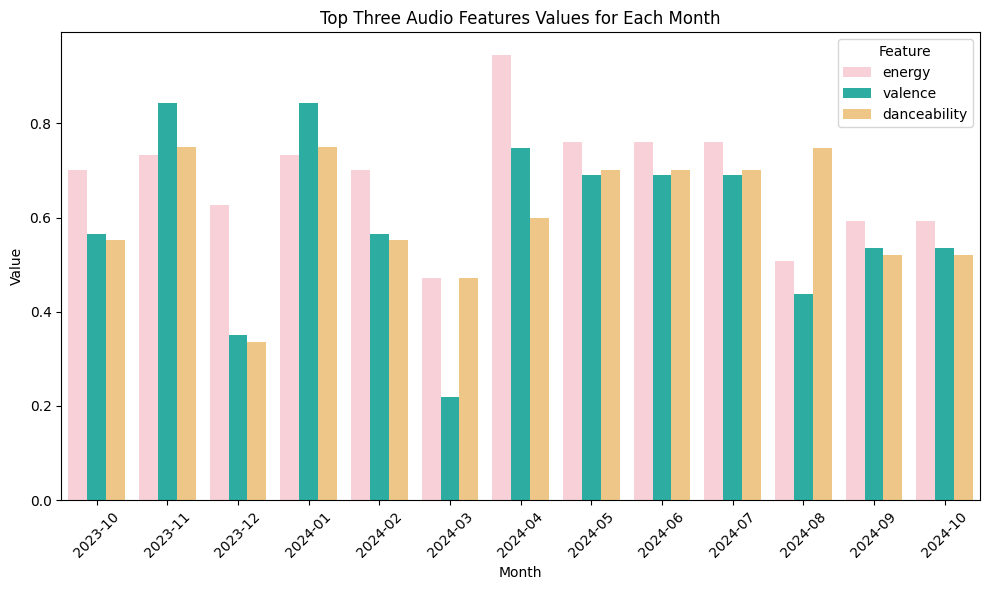

In [87]:
plot_data = pd.DataFrame({
    'Month': top_audio_df['Month'].repeat(3),
    'Feature': top_audio_df[['Top Feature 1', 'Top Feature 2', 'Top Feature 3']].values.flatten(),
    'Value': top_audio_df[['Value 1', 'Value 2', 'Value 3']].values.flatten(),
})

sns.barplot(data=plot_data, x='Month', y='Value', hue='Feature')

plt.title('Top Three Audio Features Values for Each Month')
plt.xlabel('Month')
plt.ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


- This trend gives us a better look at how the average values of the top three features for the most popular songs change over the years. 
- It’s pretty clear that energy, valence, and danceability are what people love the most. 
- This shows that listeners are really into tracks that feel lively and uplifting, which is something songwriters and marketers should definitely keep in mind.

In [20]:
# Genre/feature analysis by country 
country_danceability = df.groupby('country')['danceability'].mean().sort_values(ascending=False)
print("Average Danceability by Country:")
print(country_danceability)

Average Danceability by Country:
country
EC    0.768481
CO    0.767955
PE    0.762429
SV    0.761496
CL    0.759998
        ...   
IE    0.608784
IL    0.605291
JP    0.605157
MY    0.597804
ID    0.524325
Name: danceability, Length: 72, dtype: float64


#### Data cleaning and Outlier Detection

In [115]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


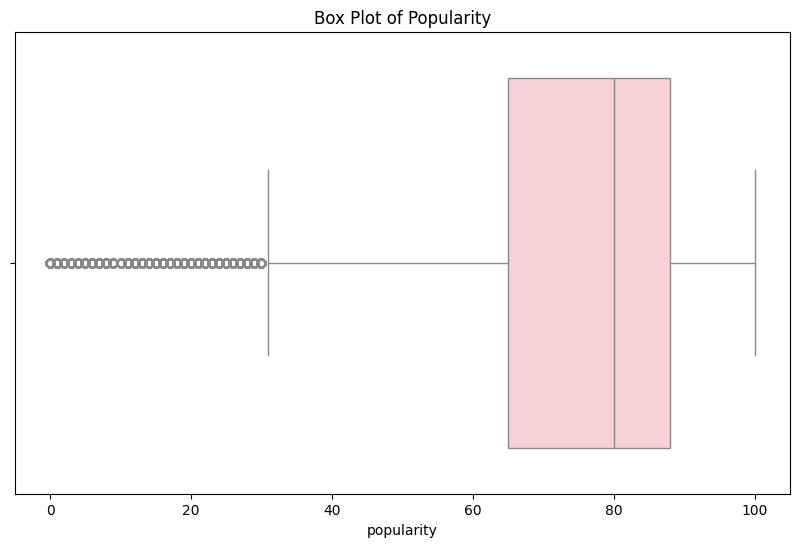

In [118]:
sns.boxplot(x=df['popularity'])
plt.title("Box Plot of Popularity")
plt.show()

- Middle Range: The box itself shows the middle 50% of your data, with most values falling between 60 and 90.
- Median: The line inside the box is the median—half the data is above and half is below this point, around 80 here.
- Spread: The "whiskers" (those lines extending out) indicate the range where most of your data sits—approximately 40 to 100.
- Outliers: Those dots outside the whiskers are outliers, which are values significantly different from the rest. Most are on the lower end of the scale. This can be an indication that there are some songs that made to the top of the chart even without being overly popular

In [119]:
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)]
print(f"Number of outliers in popularity: {len(outliers)}")

Number of outliers in popularity: 13232


In [120]:
df = df[(df['popularity'] >= lower_bound) & (df['popularity'] <= upper_bound)]